In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
df = pd.read_csv("/content/CreditPrediction.csv")

In [149]:
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


In [150]:
df.dtypes

CLIENTNUM                     int64
Customer_Age                float64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 19                 float64
dtype: object

In [151]:
df.shape

(10167, 20)

In [152]:
df.isna().sum()

CLIENTNUM                       0
Customer_Age                    0
Gender                        199
Dependent_count                 0
Education_Level                 0
Marital_Status               1950
Income_Category                 0
Card_Category                1924
Months_on_book                223
Total_Relationship_Count       20
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10167
dtype: int64

In [153]:
df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Unnamed: 19'],
      dtype='object')

## handling missing values

In [154]:
#drop because it has more than 3/4 null value
df = df.drop([ 'Unnamed: 19'], axis=1)


In [155]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Fill missing values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [156]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Fill missing values with mode for each categorical column
for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

# Print the updated DataFrame
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5,Graduate,Married,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4,High School,Married,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [157]:
df.isnull().mean().sort_values(ascending=False) * 100

CLIENTNUM                   0.0
Months_Inactive_12_mon      0.0
Total_Ct_Chng_Q4_Q1         0.0
Total_Trans_Ct              0.0
Total_Trans_Amt             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Revolving_Bal         0.0
Credit_Limit                0.0
Contacts_Count_12_mon       0.0
Total_Relationship_Count    0.0
Customer_Age                0.0
Months_on_book              0.0
Card_Category               0.0
Income_Category             0.0
Marital_Status              0.0
Education_Level             0.0
Dependent_count             0.0
Gender                      0.0
Avg_Utilization_Ratio       0.0
dtype: float64

## Exploratory Data analysis

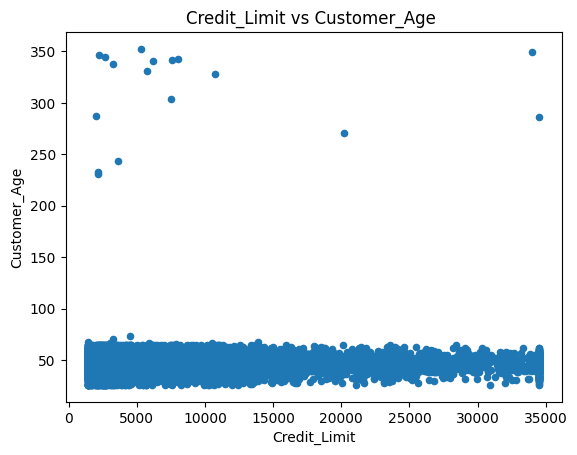

In [158]:
# Create a scatter plot of two numerical columns
df.plot.scatter('Credit_Limit', 'Customer_Age')
plt.xlabel('Credit_Limit')
plt.ylabel('Customer_Age')
plt.title('Credit_Limit vs Customer_Age ')
plt.show()


<ipython-input-159-5983fce72db1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


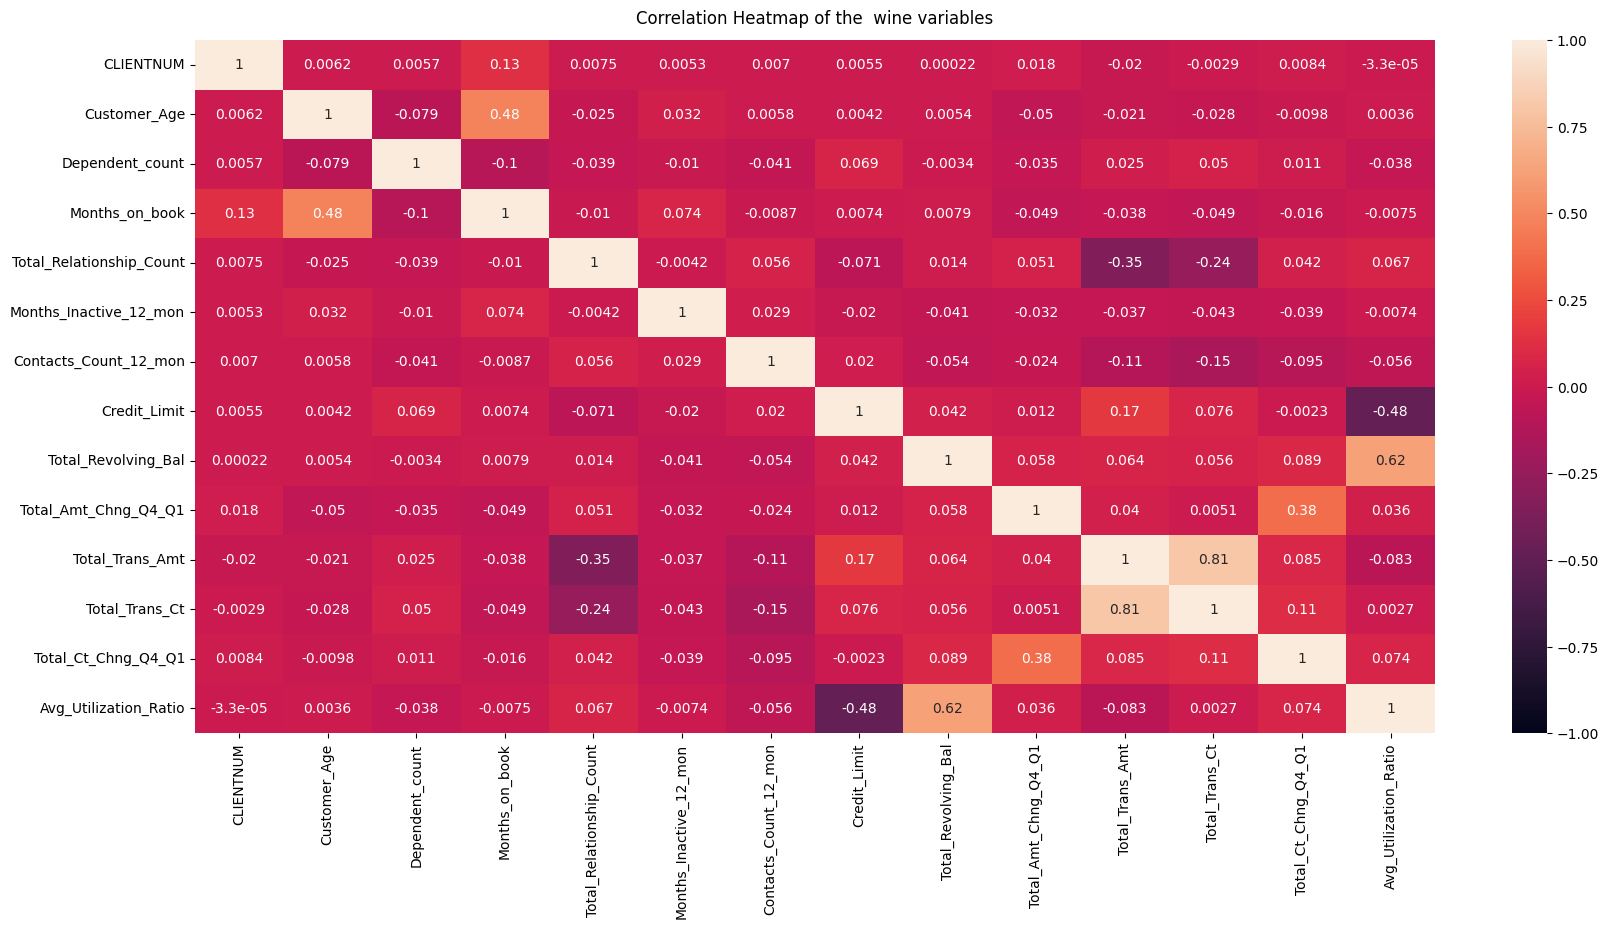

In [159]:
plt.figure(figsize=(20, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the  wine variables', fontdict={'fontsize':12}, pad=12);

In [160]:
df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

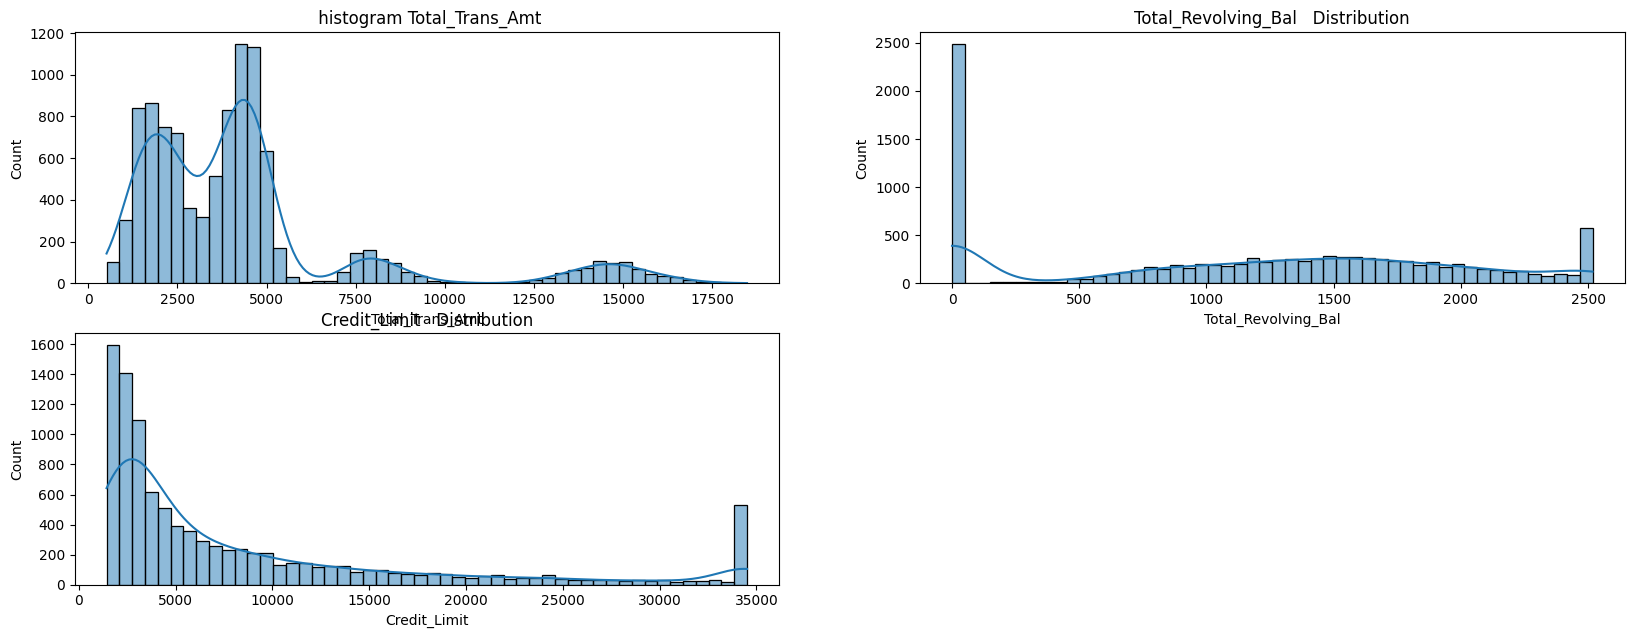

In [161]:
# Plotting distributions and relationships with the target variable
plt.figure(figsize=(20, 15))

# Total_Trans_Amt
plt.subplot(4, 2, 1)
sns.histplot(df['Total_Trans_Amt'], bins=50, kde=True)
plt.title(' histogram Total_Trans_Amt')

# Total_Revolving_Bal Distribution
plt.subplot(4, 2, 2)
sns.histplot(df['Total_Revolving_Bal'], bins=50, kde=True)
plt.title('Total_Revolving_Bal   Distribution')

# Credit_Limit   Distribution
plt.subplot(4, 2, 3)
sns.histplot(df['Credit_Limit'], bins=50, kde=True)
plt.title('Credit_Limit   Distribution')

plt.show()


In [162]:
# Calculate summary statistics for each numerical column
#summary_stats =
df.describe()
#print(summary_stats)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.016700e+04,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000
mean,7.391864e+08,46.753817,2.346513,35.913415,3.813245,2.341595,2.455887,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.712192,0.274716
std,3.690366e+07,13.520505,1.298701,7.892092,1.553211,1.010502,1.105580,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.237934,0.275638
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130407e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.582000,0.022000
50%,7.179400e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.702000,0.175000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.818000,0.502500
max,8.283431e+08,352.330517,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# showing outliers

In [163]:
df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

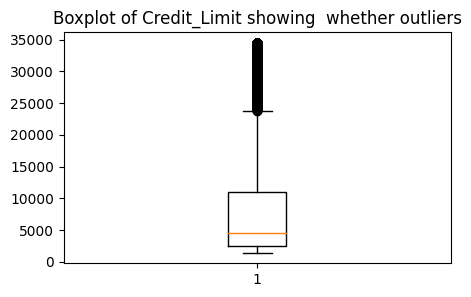

In [164]:
fig = plt.figure(figsize =(5, 3))

# Creating plot
plt.boxplot(df['Credit_Limit'])
plt.title('Boxplot of Credit_Limit showing  whether outliers')

# show plot
plt.show()

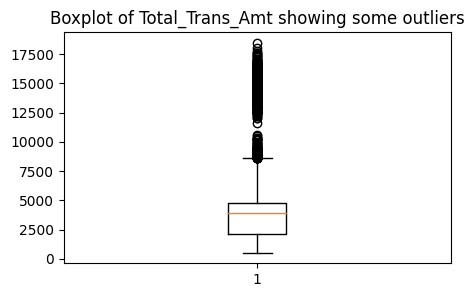

In [165]:

fig = plt.figure(figsize =(5, 3))

# Creating plot
plt.boxplot(df['Total_Trans_Amt'])
plt.title('Boxplot of Total_Trans_Amt showing some outliers')


# show plot
plt.show()

## let's consider using the IQR method to identify and remove outliers:



## min temp

In [166]:
Q1= df.Total_Trans_Amt.quantile(0.25)
Q3= df.Total_Trans_Amt.quantile(0.75)
Q1, Q3

(2155.5, 4740.0)

In [167]:
IQR = Q3-Q1


In [168]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-1721.25, 8616.75)

In [169]:
outliers = df[(df['Total_Trans_Amt'] < lower_limit) | (df['Total_Trans_Amt'] > upper_limit)]


In [170]:
cleaned_data = df[(df['Total_Trans_Amt'] >= lower_limit) & (df[ 'Total_Trans_Amt'] <= upper_limit)]


In [171]:
cleaned_data.shape

(9269, 19)

In [172]:
cleaned_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

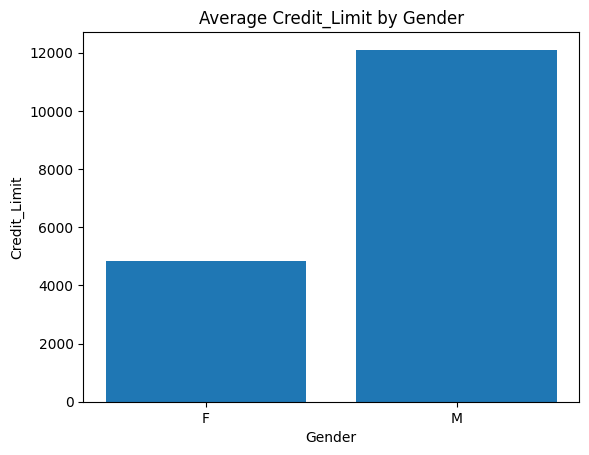

In [173]:

# Group the dataframe by gender and calculate the mean income
grouped_df = cleaned_data.groupby('Gender')['Credit_Limit'].mean()

# Plot the data
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Gender')
plt.ylabel('Credit_Limit')
plt.title('Average Credit_Limit by Gender')
plt.show()


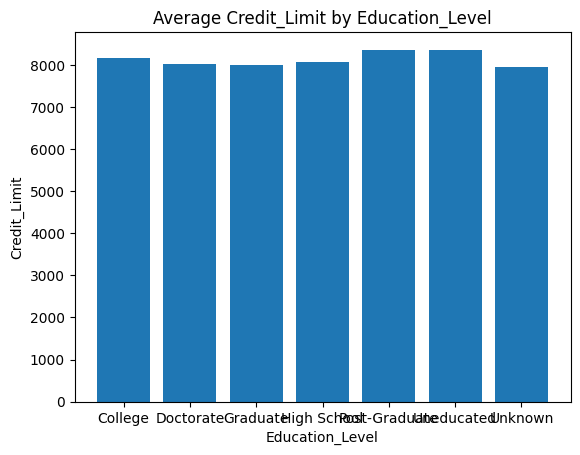

In [174]:

# Group the dataframe by gender and calculate the mean income
grouped_df = cleaned_data.groupby('Education_Level')['Credit_Limit'].mean()

# Plot the data
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Education_Level')
plt.ylabel('Credit_Limit')
plt.title('Average Credit_Limit by Education_Level')
plt.show()


In [175]:
cleaned_data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5,Graduate,Married,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4,High School,Married,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [176]:
cleaned_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [177]:
cleaned_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9.269000e+03,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000
mean,7.394906e+08,46.860333,2.351818,36.002096,3.950549,2.351171,2.471464,8096.663038,1146.503722,0.756425,3495.219657,60.917790,0.707976,0.284424
std,3.702503e+07,13.234564,1.296293,7.870105,1.502586,1.012649,1.114201,8711.213880,817.686537,0.226181,1674.079775,20.085019,0.246446,0.281092
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130895e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2458.000000,0.000000,0.622000,2050.000000,43.000000,0.568000,0.000000
50%,7.179790e+08,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000,4189.000000,1257.000000,0.730000,3656.000000,65.000000,0.694000,0.187000
75%,7.751986e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9981.000000,1772.000000,0.857000,4524.000000,77.000000,0.818000,0.525000
max,8.283431e+08,348.812169,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,8614.000000,113.000000,3.714000,0.999000


## FEATURE ENGINEERING

#### BINNING

In [178]:
cleaned_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [179]:
# Define the bin edges and labels
bin_edges = [1400, 17000, 35000]  # The last value should be greater than the maximum value in the column
bin_labels = ['low', 'high']

# Create the 'temp_bins' column with bin labels
cleaned_data['credit_limit_bins_2'] = pd.cut(cleaned_data['Credit_Limit'], bins=bin_edges, labels=bin_labels)

<ipython-input-179-f42cc4d100dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['credit_limit_bins_2'] = pd.cut(cleaned_data['Credit_Limit'], bins=bin_edges, labels=bin_labels)


In [180]:
# Define the bin edges and labels
#bin_edges = [1400, 10000, 20000, 35000]  # The last value should be greater than the maximum value in the column
#bin_labels = ['low', 'medium', 'high']

# Create the 'temp_bins' column with bin labels
#cleaned_data['credit_limit_bins'] = pd.cut(cleaned_data['Credit_Limit'], bins=bin_edges, labels=bin_labels)

In [181]:
# Define the bin edges and labels
#bin_edges = [1400, 15000, 35000]  # The last value should be greater than the maximum value in the column
#bin_labels = ['low', 'high']

# Create the 'temp_bins' column with bin labels
#cleaned_data['credit_limit_bins'] = pd.cut(cleaned_data['Credit_Limit'], bins=bin_edges, labels=bin_labels)

In [182]:
cleaned_data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,credit_limit_bins_2
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,low
1,818770008,49.0,F,5,Graduate,Married,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,low
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,low
3,769911858,40.0,F,4,High School,Married,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,low
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,low


## label encoding

In [183]:
cleaned_data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,credit_limit_bins_2
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,low
1,818770008,49.0,F,5,Graduate,Married,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,low
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,low
3,769911858,40.0,F,4,High School,Married,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,low
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,low


In [184]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Fit and transform the data
#encoded_data = label_encoder.fit_transform(df['Purchased Bike'])
cleaned_data['encoded Gender'] = label_encoder.fit_transform(cleaned_data['Gender'])
cleaned_data['Encoded Marital_Status'] = label_encoder.fit_transform(cleaned_data['Marital_Status'])

cleaned_data['Encoded credit_limit_bins_2'] = label_encoder.fit_transform(cleaned_data['credit_limit_bins_2'])


# Print the encoded data
data = cleaned_data.drop(['Marital_Status', 'Gender'], axis=1)


<ipython-input-184-c4147d6dd79c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['encoded Gender'] = label_encoder.fit_transform(cleaned_data['Gender'])
<ipython-input-184-c4147d6dd79c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Encoded Marital_Status'] = label_encoder.fit_transform(cleaned_data['Marital_Status'])
<ipython-input-184-c4147d6dd79c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [185]:
data.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,credit_limit_bins_2,encoded Gender,Encoded Marital_Status,Encoded credit_limit_bins_2
0,768805383,45.0,3,High School,$60K - $80K,Blue,39.0,5.0,1,3,...,777,1.335,1144,42,1.625,0.061,low,1,1,1
1,818770008,49.0,5,Graduate,Less than $40K,Blue,44.0,6.0,1,2,...,864,1.541,1291,33,3.714,0.105,low,0,1,1
2,713982108,51.0,3,Graduate,$80K - $120K,Blue,36.0,4.0,1,0,...,0,2.594,1887,20,2.333,0.000,low,1,1,1
3,769911858,40.0,4,High School,Less than $40K,Blue,34.0,3.0,4,1,...,2517,1.405,1171,20,2.333,0.760,low,0,1,1
4,709106358,40.0,3,Uneducated,$60K - $80K,Blue,21.0,5.0,1,0,...,0,2.175,816,28,2.500,0.000,low,1,1,1


# machine learning

In [186]:
data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'credit_limit_bins_2',
       'encoded Gender', 'Encoded Marital_Status',
       'Encoded credit_limit_bins_2'],
      dtype='object')

In [187]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the X features and dependent variable
X = data[['Customer_Age', 'Total_Revolving_Bal','encoded Gender','Total_Trans_Ct','Total_Trans_Amt']]


y = data['Credit_Limit']



In [188]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 59683732.22325645
R-squared Score: 0.18380126719734724


In [189]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [190]:
lasso = Lasso(alpha=0.1)  # Setting alpha value for L1 regularization
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [191]:
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.18380170610007096
